In [24]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import numpy as np

augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_shift=-0.5, max_shift=0.5, p=0.5),
])

# Generate 2 seconds of dummy audio for the sake of example
samples = np.random.uniform(low=-0.2, high=0.2, size=(32000,)).astype(np.float32)

# Augment/transform/perturb the audio data
augmented_samples = augment(samples=samples, sample_rate=16000)

print(augmented_samples.shape)

(32000,)


In [25]:
from IPython.display import Audio
Audio(augmented_samples, rate=16000)

In [18]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show(block=False)

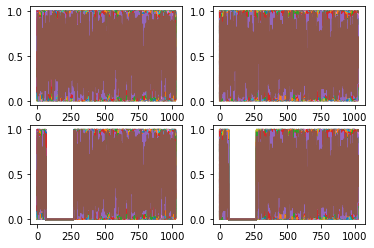

In [17]:
from audiomentations import SpecCompose, SpecChannelShuffle, SpecFrequencyMask
import numpy as np

augment = SpecCompose(
    [
        SpecChannelShuffle(p=0.5),
        SpecFrequencyMask(p=0.7),
    ]
)

# Example spectrogram with 1025 frequency bins, 256 time steps and 2 audio channels
spectrogram = np.random.random((1025, 256, 2))

figure, axes = plt.subplots(2, 2)
axes[0][0].plot(spectrogram[:,:,0])
axes[0][1].plot(spectrogram[:,:,1])
# Augment/transform/perturb the spectrogram
augmented_spectrogram = augment(spectrogram)
axes[1][0].plot(augmented_spectrogram[:,:,0])
axes[1][1].plot(augmented_spectrogram[:,:,1])
plt.show(block=False)

In [56]:
from torchaudio.transforms import Resample
import torchaudio
# resample = Resample(input_sample_rate, output_sample_rate,
#                     resampling_method = 'kaiser_window', lowpass_filter_width= 64)
# resample2 = Resample(output_sample_rate, input_sample_rate,
#                      resampling_method = 'kaiser_window', lowpass_filter_width= 64)
audio_path_raw = 'TanhDistortion_input.flac'
waveform_raw, sample_rate_raw = torchaudio.load(audio_path_raw)
sample_rate_out = 2000
sample_rate_high = 44100
# resample = Resample(sample_rate_raw, sample_rate_out,resampling_method = 'kaiser_window', lowpass_filter_width= 16)
# resample2 = Resample(sample_rate_out, sample_rate_high, lowpass_filter_width= 1)
# waveform_sample = resample2(resample(waveform_raw))
print(sample_rate_raw)

16000


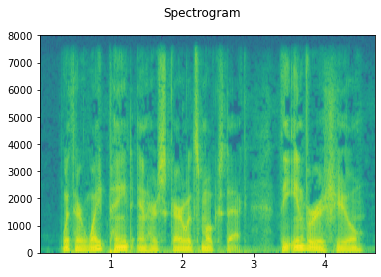

In [48]:
plot_specgram(waveform_raw, sample_rate_raw)
Audio(waveform_raw.numpy(),rate=sample_rate_raw)

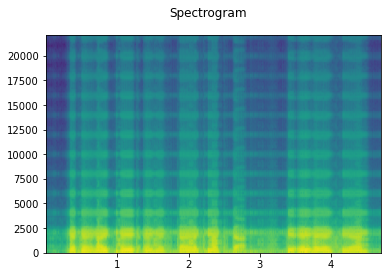

In [57]:
plot_specgram(waveform_sample, sample_rate_high)
Audio(waveform_sample.numpy(),rate=sample_rate_high)

模拟